In [136]:
from cloudmesh.common.Shell import Shell
from cloudmesh.common import readfile
import sys
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [137]:
def read_energy(filename):
   full_filename = Shell.map_filename(filename).path
   # 1: means removing hashes
   content = readfile(full_filename).splitlines()[1:]

   # removing #
   content[0] = content[0][2:]

   # print(content[0:10])

   content = "\n".join(content)
   content = content.replace(', ', ',')
   df = pd.read_csv(io.StringIO(content),sep=',')
   # df = pd.DataFrame([sub.split(",") for sub in content])
   # display(df)
   return df


In [138]:
def export_figure(x, y, filename):

   plt.xlabel('Time/s')
   plt.ylabel('Energy/W')


   base = os.path.dirname(filename.replace('_', '-').lower())
   png = base + ".png"
   pdf = base + ".pdf"

   plt.savefig(png, bbox_inches='tight', dpi=600)
   plt.savefig(pdf, bbox_inches='tight')

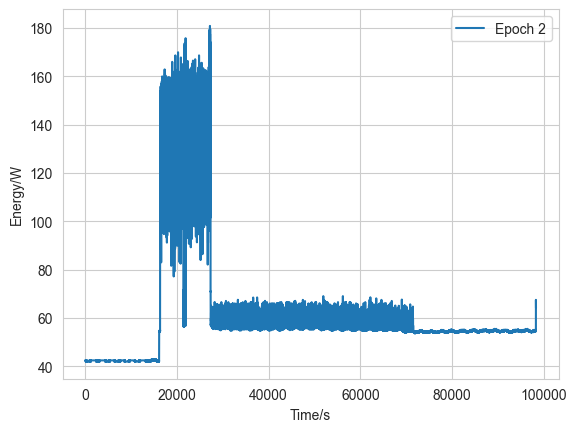

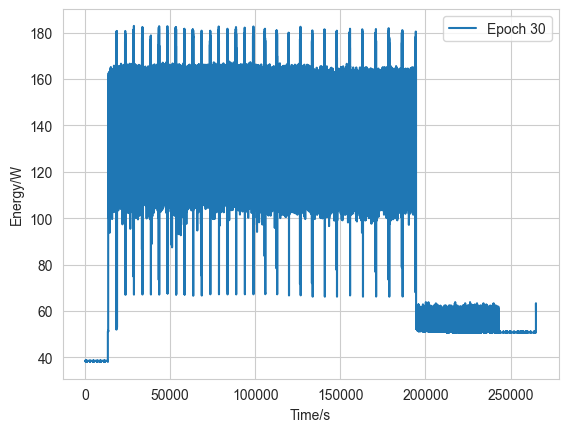

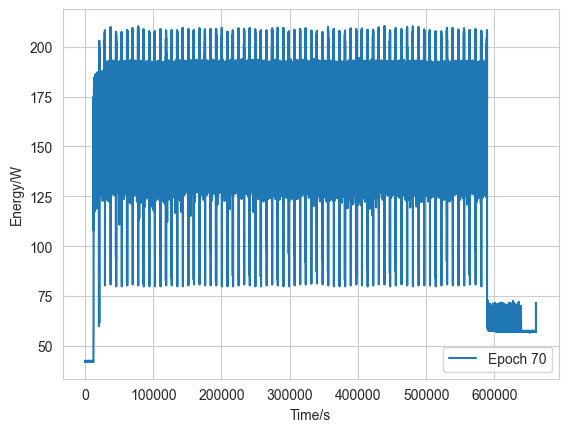

In [139]:
list_of_filenames = [('./data/card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/gpu0.log', 2),
                     ('./data/card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_30/gpu0.log', 30),
                     ('./data/card_name_v100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_70/gpu0.log', 70)]


for filename, epoch in list_of_filenames:
   fig, ax = plt.subplots()
   df = read_energy(filename)
   label = f'Epoch {epoch}'
   df.rename(columns = {'0 power_draw W':label}, inplace=True)
   energy = df[['time', label]]
   # display(energy)
   sns.lineplot(energy)
   export_figure('Time', 'Energy', filename)
   plt.show()